In [1]:
import avro.schema
import io, random, os, time
from avro.io import DatumWriter, DatumReader
from avro.datafile import DataFileReader, DataFileWriter

# Load schema
schema_path = "data/click_log.avsc"
store_path = "data/click_log.avro"
schema = avro.schema.parse(open(schema_path).read())

In [7]:
out = []
for size in range(10):
    writer = DataFileWriter(open(store_path, "wb"), DatumWriter(), schema)
    for item in xrange(size):
    #     writer = avro.io.DatumWriter(schema)
    #     bytes_writer = io.BytesIO()
    #     encoder = avro.io.BinaryEncoder(bytes_writer)
        writer.append({
                      "user_id": random.randint(0,1000000),
                      "time": int(time.time()),  # Simulate 1 click per second
                      "action": random.randint(0,3),
                      "destination": random.randint(0, 10000),
                      "hotel": random.randint(0,1000)}) #, encoder)
        time.sleep(1)              
    writer.close()
    out.append(os.stat(store_path).st_size)

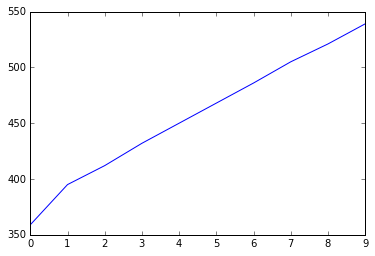

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(out)